# Robot Evolution System within the **Revolve** Framework

In this notebook, you will learn to create a **robot evolution system** within the **Revolve** framework. The workflow will follow the operations outlined in the Book *XXX*:

![image info](images/ER_pipeline.png "Title") 



## Target (Revolve-Specific) Setup:
- **Define robot phenotype** (predefined)
- **Define robot environment** (terrains)
- **Define the target behavior** (task-closely related to fitness) target tasks : example. targeted locomotion -> fitness functions

In [8]:
"""Robot Phenotype : A robot's phenotype is combination of its morphology and its controller."""


# Revolve uses modular robot morphologies made up of a core module, (passive)bricks and (actuated) hinges.
# To learn about the inticacies of the modules see the following files (ctrl + click to open file):
from revolve2.modular_robot.body.v2 import _attachment_face_core_v2, CoreV2, BrickV2, ActiveHingeV2, BodyV2

# A robot's brain structure is determined by its morphology. 
# Each joint of a robot (active_hinge) corresponds to a neuron (CPG) in the robot's brain,
# The connections between neurons define how each joint influences the others, and thus the robot's movement. 
# To learn about CPGs see the methodology section of the paper. (https://doi.org/10.1038/s41598-023-48338-4)

# The following files define the brain structure of the robot:
# Movement arises from the output of the CPG (angle), which is passed on to the actuated hinges (active hinges), 
# which in turn (depending on the morhopology) move the robot.
from revolve2.modular_robot.brain.cpg import _brain_cpg_instance, _brain_cpg_network_neighbor, _make_cpg_network_structure_neighbor, _cpg_network_structure, _make_cpg_network_structure_neighbor

# Combining the morphology and the brain structure, we get the robot's phenotype.
# An agent in the simulation will be thus defined by its body and brain.

In [2]:
"""Robot Environment : The setting in which the robot is placed, and tested."""

# Each robot is placed in a simulated environment, where it can move around freely or interact with objects or other robots.
# The surface of the environment can be edited to create different terrains. 

# The following files contain example terrains that can be used:
from revolve2.standards import terrains

In [4]:
"""Robot Target Behaviour : The desired behaviour of the robot in the environment."""

# Robots can be evolved, to perform a task that corresponds to maximizing a certain fitness function.
from revolve2.standards import fitness_functions

## Representation:
- **Define robot genotype**
- **Define fitness function**

In [3]:
"""Robot Genotype : Body genotype and Brain genotype are separate, and are combined to form the robot's phenotype."""

# imports
from revolve2.standards.modular_robots_v2 import spider_v2


# The following is an example of a robot's body genotype.

body = spider_v2() # a simple cross shaped robot, wirth 4 'legs' and two joints (active hinges) per leg.

# See the multineat documentation for more information on the genotype. 


In [2]:
import multineat
from revolve2.experimentation.rng import make_rng_time_seed
from revolve2.standards.genotypes.cppnwin._multineat_rng_from_random import multineat_rng_from_random

rng = make_rng_time_seed()
mtn_rng = multineat_rng_from_random(rng)

# genome=multineat.Genome(unsigned int a_ID,
#                unsigned int a_NumInputs,
#                unsigned int a_NumHidden, // ignored for seed_type == 0, specifies number of hidden units if seed_type == 1
#                unsigned int a_NumOutputs,
#                bool a_FS_NEAT, ActivationFunction a_OutputActType,
#                ActivationFunction a_HiddenActType,
#                unsigned int a_SeedType,
#                const Parameters &a_Parameters,
#                unsigned int a_NumLayers)

genome = multineat.Genome(0,
                          2,
                          0,
                          2,       
                        False,
                        multineat.ActivationFunction.SIGNED_SIGMOID,
                        multineat.ActivationFunction.SIGNED_SIGMOID,
                          0,
                        multineat.Parameters(),
                          1
                        )


substrate = multineat.Substrate([iter([i for i in range(2)]), iter([i for i in range(2)])],
                                [],
                                [iter([i for i in range(2)]), iter([i for i in range(2)])])
nn = multineat.NeuralNetwork()

genome.BuildHyperNEATPhenotype(nn, substrate, mtn_rng)

DoublesList[0.5, 0.5]


In [9]:
import multineat

params = multineat.Parameters()

g = multineat.Genome(0, # id
                     3, # (num_inputs+1)
                     2, # if seed type is 1 : num_hidden_nodes , else : ignored
                     2, # num_outputs
                     False, # FS_NEAT (feature selection NEAT https://nn.cs.utexas.edu/?whiteson:gecco05)
                     multineat.ActivationFunction.UNSIGNED_SIGMOID, # output activation type
                     multineat.ActivationFunction.UNSIGNED_SIGMOID, # hidden activation type
                     1, # seed type
                     params, # multineat parameters
                     1 # number of hidden layers (number of hidden nodes is multiplied by this value)
                    )


"""
			NumInputs = 1;
			NumHidden = 0;
			NumOutputs = 1;
			FS_NEAT = 0;
			FS_NEAT_links = 1;
			HiddenActType = UNSIGNED_SIGMOID;
			OutputActType = UNSIGNED_SIGMOID;
			SeedType = GenomeSeedType::PERCEPTRON;
			NumLayers = 0;
"""

print(g.PrintAllTraits())

g.MutateWithConstraints()

# print(g.GetLinkTraits(True)) # [ (from, to, dict, weight) ]
# print(g.GetNeuronTraits())

None
0.0
Genome:

Neurons:
ID: 1 : b(0) : 
ID: 2 : b(0) : 
ID: 3 : b(0) : 
ID: 4 : b(0) : 
ID: 5 : b(0) : 
ID: 6 : b(0) : 
ID: 7 : b(0) : 
Links:
ID: 1 : w(0) : 
ID: 2 : w(0) : 
ID: 3 : w(0) : 
ID: 4 : w(0) : 
ID: 5 : w(0) : 
ID: 6 : w(0) : 
ID: 7 : w(0) : 
ID: 8 : w(0) : 
ID: 9 : w(0) : 
ID: 10 : w(0) : 


In [16]:
"""
    Genome::Genome(const Parameters &a_Parameters,
				   const GenomeInitStruct &in
                   )
    {
        ASSERT((a_NumInputs > 1) && (a_NumOutputs > 0));
        RNG t_RNG;
        t_RNG.TimeSeed();

        m_ID = 0;
        int t_innovnum = 1, t_nnum = 1;
		GenomeSeedType seed_type = in.SeedType;
        
        // override seed_type if 0 hidden units are specified
        if ((seed_type == LAYERED) && (in.NumHidden == 0))
        {
			seed_type = PERCEPTRON;
        }

        if (a_Parameters.DontUseBiasNeuron == false)
        {

            // Create the input neurons.
            // Warning! The last one is a bias!
            // The order of the neurons is very important. It is the following: INPUTS, BIAS, OUTPUTS, HIDDEN ... (no limit)
            for (unsigned int i = 0; i < (in.NumInputs - 1); i++)
            {
                NeuronGene n = NeuronGene(INPUT, t_nnum, 0.0);
                // Initialize the traits
                //n.InitTraits(a_Parameters.NeuronTraits, t_RNG); // no need to init traits for inputs
                m_NeuronGenes.emplace_back(n);
                t_nnum++;
            }
            // add the bias
            NeuronGene n = NeuronGene(BIAS, t_nnum, 0.0);
            // Initialize the traits
            //n.InitTraits(a_Parameters.NeuronTraits, t_RNG); // no need to init traits for inputs

            m_NeuronGenes.emplace_back(n);
            t_nnum++;
        }
        else
        {
            // Create the input neurons without marking the last node as bias.
            // The order of the neurons is very important. It is the following: INPUTS, OUTPUTS, HIDDEN ... (no limit)
            for (unsigned int i = 0; i < in.NumInputs; i++)
            {
                NeuronGene n = NeuronGene(INPUT, t_nnum, 0.0);
                // Initialize the traits
                //n.InitTraits(a_Parameters.NeuronTraits, t_RNG); // no need to init traits for inputs

                m_NeuronGenes.emplace_back(n);
                t_nnum++;
            }
        }

        // now the outputs
        for (unsigned int i = 0; i < (in.NumOutputs); i++)
        {
            NeuronGene t_ngene(OUTPUT, t_nnum, 1.0);
            // Initialize the neuron gene's properties
            t_ngene.Init((a_Parameters.MinActivationA + a_Parameters.MaxActivationA) / 2.0f,
                         (a_Parameters.MinActivationB + a_Parameters.MaxActivationB) / 2.0f,
                         (a_Parameters.MinNeuronTimeConstant + a_Parameters.MaxNeuronTimeConstant) / 2.0f,
                         (a_Parameters.MinNeuronBias + a_Parameters.MaxNeuronBias) / 2.0f,
                         in.OutputActType);
            // Initialize the traits
            t_ngene.InitTraits(a_Parameters.NeuronTraits, t_RNG);

            m_NeuronGenes.emplace_back(t_ngene);
            t_nnum++;
        }
        
        // Now add LEO
        /*if (a_Parameters.Leo)
        {
            NeuronGene t_ngene(OUTPUT, t_nnum, 1.0);
            // Initialize the neuron gene's properties
            t_ngene.Init((a_Parameters.MinActivationA + a_Parameters.MaxActivationA) / 2.0f,
                         (a_Parameters.MinActivationB + a_Parameters.MaxActivationB) / 2.0f,
                         (a_Parameters.MinNeuronTimeConstant + a_Parameters.MaxNeuronTimeConstant) / 2.0f,
                         (a_Parameters.MinNeuronBias + a_Parameters.MaxNeuronBias) / 2.0f,
                         UNSIGNED_STEP);
            // Initialize the traits
            t_ngene.InitTraits(a_Parameters.NeuronTraits, t_RNG);

            m_NeuronGenes.emplace_back(t_ngene);
            t_nnum++;
            in.NumOutputs++;
        }*/

        // add and connect hidden neurons if seed type is != 0
        if ((in.SeedType == LAYERED) && (in.NumHidden > 0))
        {
            double lt_inc = 1.0 / (in.NumLayers+1);
            double initlt = lt_inc;
            for (unsigned int n = 0; n < in.NumLayers; n++)
            {
                for (unsigned int i = 0; i < in.NumHidden; i++)
                {
                    NeuronGene t_ngene(HIDDEN, t_nnum, 1.0);
                    // Initialize the neuron gene's properties
                    t_ngene.Init((a_Parameters.MinActivationA + a_Parameters.MaxActivationA) / 2.0f,
                                 (a_Parameters.MinActivationB + a_Parameters.MaxActivationB) / 2.0f,
                                 (a_Parameters.MinNeuronTimeConstant + a_Parameters.MaxNeuronTimeConstant) / 2.0f,
                                 (a_Parameters.MinNeuronBias + a_Parameters.MaxNeuronBias) / 2.0f,
                                 in.HiddenActType);
                    // Initialize the traits
                    t_ngene.InitTraits(a_Parameters.NeuronTraits, t_RNG);
                    t_ngene.m_SplitY = initlt;
        
                    m_NeuronGenes.emplace_back(t_ngene);
                    t_nnum++;
                }
    
                initlt += lt_inc;
            }

            if (!in.FS_NEAT)
            {
                int last_dest_id = in.NumInputs + in.NumOutputs + 1;
                int last_src_id = 1;
                int prev_layer_size = in.NumInputs;
                
                for (unsigned int n = 0; n < in.NumLayers; n++)
                {
                    // The links from each previous layer to this hidden node
                    for (unsigned int i = 0; i < in.NumHidden; i++)
                    {
                        for (unsigned int j = 0; j < prev_layer_size; j++)
                        {
                            // add the link
                            // created with zero weights. needs future random initialization. !!!!!!!!
                            // init traits (TODO: maybe init empty traits?)
                            LinkGene l = LinkGene(j + last_src_id, i + last_dest_id, t_innovnum, 0.0, false);
                            l.InitTraits(a_Parameters.LinkTraits, t_RNG);
                            m_LinkGenes.emplace_back(l);
                            t_innovnum++;
                        }
                    }
    
                    last_dest_id += in.NumHidden;
                    if (n == 0)
                    {
                        // for the first hidden layer, jump over the outputs too
                        last_src_id += prev_layer_size + in.NumOutputs;
                    }
                    else
                    {
                        last_src_id += prev_layer_size;
                    }
                    prev_layer_size = in.NumHidden;
                }
    
                last_dest_id = in.NumInputs + 1;
    
                // The links from each previous layer to this output node
                for (unsigned int i = 0; i < in.NumOutputs; i++)
                {
                    for (unsigned int j = 0; j < prev_layer_size; j++)
                    {
                        // add the link
                        // created with zero weights. needs future random initialization. !!!!!!!!
                        // init traits (TODO: maybe init empty traits?)
                        LinkGene l = LinkGene(j + last_src_id, i + last_dest_id, t_innovnum, 0.0, false);
                        l.InitTraits(a_Parameters.LinkTraits, t_RNG);
                        m_LinkGenes.emplace_back(l);
                        t_innovnum++;
                    }
                }
    
                /*if (a_Parameters.DontUseBiasNeuron == false)
                {
                    // Connect the bias as well
                    for (unsigned int i = 0; i < a_NumOutputs; i++)
                    {
                        // add the link
                        // created with zero weights. needs future random initialization. !!!!!!!!
                        LinkGene l = LinkGene(a_NumInputs, i + last_dest_id, t_innovnum, 0.0, false);
                        l.InitTraits(a_Parameters.LinkTraits, t_RNG);
                        m_LinkGenes.emplace_back(l);
                        t_innovnum++;
                    }
                }*/
            }
        }
        else    // The links connecting every input to every output - perceptron structure
        {
            if ((!in.FS_NEAT) && (seed_type == PERCEPTRON))
            {
                for (unsigned int i = 0; i < (in.NumOutputs); i++)
                {
                    for (unsigned int j = 0; j < in.NumInputs; j++)
                    {
                        // add the link
                        // created with zero weights. needs future random initialization. !!!!!!!!
                        LinkGene l = LinkGene(j + 1, i + in.NumInputs + 1, t_innovnum, 0.0, false);
                        l.InitTraits(a_Parameters.LinkTraits, t_RNG);
                        m_LinkGenes.emplace_back(l);
                        t_innovnum++;
                    }
                }
            }
            else
            {
                // Start very minimally - connect a random input to each output
                // Also connect the bias to every output
                
                std::vector< std::pair<int, int> > made_already;
                bool there=false;
                int linksmade = 0;
                
                // do this a few times for more initial links created
                // TODO: make sure the innovations don't repeat for the same input/output pairs
                while(linksmade < in.FS_NEAT_links)
                {
                    for (unsigned int i = 0; i < in.NumOutputs; i++)
                    {
                        int t_inp_id = t_RNG.RandInt(1, in.NumInputs - 1);
                        int t_bias_id = in.NumInputs;
                        int t_outp_id = in.NumInputs + 1 + i;
                        
                        // check if there already
                        there=false;
                        for(auto it = made_already.begin(); it != made_already.end(); it++)
                        {
                            if ((it->first == t_inp_id) && (it->second == t_outp_id))
                            {
                                there = true;
                                break;
                            }
                        }
                        
                        if (!there)
                        {
                            // created with zero weights. needs future random initialization. !!!!!!!!
                            LinkGene l = LinkGene(t_inp_id, t_outp_id, t_innovnum, 0.0, false);
                            l.InitTraits(a_Parameters.LinkTraits, t_RNG);
                            m_LinkGenes.emplace_back(l);
                            t_innovnum++;
    
                            if (a_Parameters.DontUseBiasNeuron == false)
                            {
                                LinkGene bl = LinkGene(t_bias_id, t_outp_id, t_innovnum, 0.0, false);
                                bl.InitTraits(a_Parameters.LinkTraits, t_RNG);
                                m_LinkGenes.emplace_back(bl);
                                t_innovnum++;
                            }
                            
                            linksmade++;
                            made_already.push_back(std::make_pair(t_inp_id, t_outp_id));
                        }
                    }
                }
            }
        }

        if (in.FS_NEAT && (in.FS_NEAT_links==1))
        {
            throw std::runtime_error("Known bug - don't use FS-NEAT with just 1 link and 1/1/1 genome");
        }
        
        // Also initialize the Genome's traits
        m_GenomeGene.InitTraits(a_Parameters.GenomeTraits, t_RNG);

        m_Evaluated = false;
        m_NumInputs = in.NumInputs;
        m_NumOutputs = in.NumOutputs;
        m_Fitness = 0.0;
        m_AdjustedFitness = 0.0;
        m_OffspringAmount = 0.0;
        m_Depth = 0;
        m_PhenotypeBehavior = NULL;
    
        m_initial_num_neurons = NumNeurons();
        m_initial_num_links = NumLinks();
    }
"""

'\n    Genome::Genome(const Parameters &a_Parameters,\n\t\t\t\t   const GenomeInitStruct &in\n                   )\n    {\n        ASSERT((a_NumInputs > 1) && (a_NumOutputs > 0));\n        RNG t_RNG;\n        t_RNG.TimeSeed();\n\n        m_ID = 0;\n        int t_innovnum = 1, t_nnum = 1;\n\t\tGenomeSeedType seed_type = in.SeedType;\n        \n        // override seed_type if 0 hidden units are specified\n        if ((seed_type == LAYERED) && (in.NumHidden == 0))\n        {\n\t\t\tseed_type = PERCEPTRON;\n        }\n\n        if (a_Parameters.DontUseBiasNeuron == false)\n        {\n\n            // Create the input neurons.\n            // Warning! The last one is a bias!\n            // The order of the neurons is very important. It is the following: INPUTS, BIAS, OUTPUTS, HIDDEN ... (no limit)\n            for (unsigned int i = 0; i < (in.NumInputs - 1); i++)\n            {\n                NeuronGene n = NeuronGene(INPUT, t_nnum, 0.0);\n                // Initialize the traits\n     

In [2]:
"""How exactly does a robot's body determine its brain structure?"""

# imports
from revolve2.standards.modular_robots_v2 import *
from revolve2.modular_robot import ModularRobot
from revolve2.modular_robot.brain.cpg._make_cpg_network_structure_neighbor import active_hinges_to_cpg_network_structure_neighbor


# Example robot body
body = gecko_v2()

"""
def gecko_v2() -> BodyV2:
    # Sample robot with new HW config.

    body = BodyV2()

    body.core_v2.right_face.bottom = ActiveHingeV2(0.0)
    body.core_v2.right_face.bottom.attachment = BrickV2(0.0)

    body.core_v2.left_face.bottom = ActiveHingeV2(0.0)
    body.core_v2.left_face.bottom.attachment = BrickV2(0.0)

    body.core_v2.back_face.bottom = ActiveHingeV2(np.pi / 2.0)
    body.core_v2.back_face.bottom.attachment = BrickV2(-np.pi / 2.0)
    body.core_v2.back_face.bottom.attachment.front = ActiveHingeV2(np.pi / 2.0)
    body.core_v2.back_face.bottom.attachment.front.attachment = BrickV2(-np.pi / 2.0)
    body.core_v2.back_face.bottom.attachment.front.attachment.left = ActiveHingeV2(0.0)
    body.core_v2.back_face.bottom.attachment.front.attachment.right = ActiveHingeV2(0.0)
    body.core_v2.back_face.bottom.attachment.front.attachment.left.attachment = BrickV2(
        0.0
    )
    body.core_v2.back_face.bottom.attachment.front.attachment.right.attachment = (
        BrickV2(0.0)
    )
    
    return body
"""

# Get the all the active hinges in the body
active_hinges = body.find_modules_of_type(ActiveHingeV2)

# This returns CpgNetworkStructure object and a mapping between the indicies of the CPGs and, the active hinges they correspond to.
cpg_network_structure = active_hinges_to_cpg_network_structure_neighbor(active_hinges)[1]

# 


print(cpg_network_structure)



[(0, <revolve2.modular_robot.body.v2._active_hinge_v2.ActiveHingeV2 object at 0x729709d98ed0>), (1, <revolve2.modular_robot.body.v2._active_hinge_v2.ActiveHingeV2 object at 0x729709cd8e90>), (2, <revolve2.modular_robot.body.v2._active_hinge_v2.ActiveHingeV2 object at 0x729709cd9310>), (3, <revolve2.modular_robot.body.v2._active_hinge_v2.ActiveHingeV2 object at 0x729709cd9650>), (4, <revolve2.modular_robot.body.v2._active_hinge_v2.ActiveHingeV2 object at 0x729709d741d0>), (5, <revolve2.modular_robot.body.v2._active_hinge_v2.ActiveHingeV2 object at 0x729709da5050>)]


['ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'BrickV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveHingeV2', 'ActiveH

<BarContainer object of 2 artists>

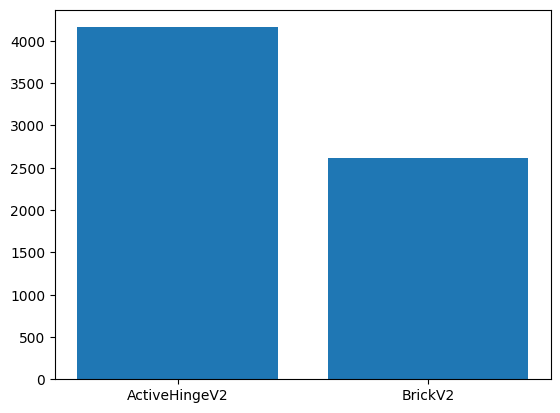

In [1]:
# import outputs from brick_vs_hinge.txt
output_lst = []
with open('brick_vs_hinge.txt', 'r') as f:
    for line in f:
        output_lst.append(line.strip("."))

output_lst = [output_lst[i].split(",")[1].split(".")[5].split(" ")[0] for i in range(len(output_lst))]
print(output_lst)

# plot the ouput_lst, by counting the number of class occurances
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(output_lst)
print(counter)
plt.bar(counter.keys(), counter.values())


## Recombination:
- **Define mutation operator**
- **Define crossover operator**

## Selection:
- **Define parent selection method**
- **Define survivor selection method**

## Parameters:
- **Population size**
- **Operator parameters** (crossover/mutation rate, terminal condition, etc.)